In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 12)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    # Один рядок коду
    h_thetha = np.dot(X, theta)
    ######################
    return h_thetha

In [8]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    J = np.sum((hypothesis(X, theta) - y)**2)/(2*m)
    ######################
    return J

In [9]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
    d_theta = np.dot(hypothesis(X, theta) - y, X) / m
    ######################
    return d_theta

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        print(theta)
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [11]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [47]:
X, y = load_datasets('data/burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [48]:
#X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
X_train, X_test, y_train, y_test = X, np.array((0,0)), y, np.array((0,0))
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(97,), y=(97,)
Test set: X=(2,), y=(2,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

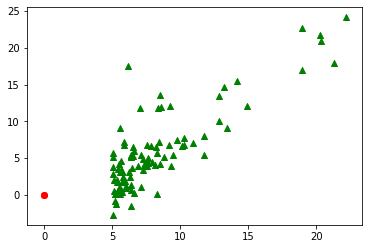

In [49]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [50]:
X_train_norm, mean, std = normalize(X_train)
X_train_norm = X_train
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

Для спрощення записів аліас для вектора передбачуваних значень

In [51]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [52]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (97, 2)
y: (97,)
32.072733877455676


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [55]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [56]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
new_theta =  [-3.63, 1.17]

[0.05839135 0.6532885 ]
[0.06289175 0.77000978]
[0.05782293 0.79134812]
[0.05106363 0.79572981]
[0.04401438 0.79709618]
[0.03692413 0.79792547]
[0.02983712 0.79865824]
[0.02276118 0.79937279]
[0.0156977  0.80008305]
[0.0086469 0.8007915]
[0.00160879 0.80149857]
[-0.00541662  0.80220436]
[-0.01242938  0.80290886]
[-0.01942949  0.8036121 ]
[-0.02641699  0.80431407]
[-0.03339189  0.80501478]
[-0.04035421  0.80571422]
[-0.04730399  0.8064124 ]
[-0.05424124  0.80710932]
[-0.06116598  0.80780498]
[-0.06807824  0.8084994 ]
[-0.07497804  0.80919256]
[-0.08186541  0.80988447]
[-0.08874035  0.81057513]
[-0.09560291  0.81126455]
[-0.10245309  0.81195272]
[-0.10929093  0.81263966]
[-0.11611644  0.81332535]
[-0.12292965  0.81400981]
[-0.12973057  0.81469304]
[-0.13651924  0.81537504]
[-0.14329567  0.8160558 ]
[-0.15005988  0.81673534]
[-0.15681191  0.81741365]
[-0.16355176  0.81809075]
[-0.17027946  0.81876662]
[-0.17699503  0.81944127]
[-0.1836985  0.8201147]
[-0.19038988  0.82078693]
[-0.1970692 

[-1.86752046  0.98927289]
[-1.8711766   0.98964018]
[-1.87482614  0.99000682]
[-1.87846911  0.9903728 ]
[-1.8821055   0.99073811]
[-1.88573535  0.99110277]
[-1.88935865  0.99146677]
[-1.89297542  0.99183011]
[-1.89658566  0.9921928 ]
[-1.9001894   0.99255483]
[-1.90378665  0.99291622]
[-1.90737741  0.99327695]
[-1.9109617   0.99363703]
[-1.91453952  0.99399646]
[-1.9181109   0.99435524]
[-1.92167584  0.99471338]
[-1.92523436  0.99507087]
[-1.92878645  0.99542772]
[-1.93233215  0.99578392]
[-1.93587145  0.99613948]
[-1.93940438  0.9964944 ]
[-1.94293094  0.99684869]
[-1.94645113  0.99720233]
[-1.94996499  0.99755533]
[-1.95347251  0.9979077 ]
[-1.9569737   0.99825943]
[-1.96046859  0.99861053]
[-1.96395718  0.998961  ]
[-1.96743947  0.99931083]
[-1.97091549  0.99966004]
[-1.97438525  1.00000861]
[-1.97784875  1.00035656]
[-1.981306    1.00070388]
[-1.98475703  1.00105057]
[-1.98820183  1.00139664]
[-1.99164043  1.00174208]
[-1.99507282  1.0020869 ]
[-1.99849903  1.0024311 ]
[-2.00191906

[-2.81908562  1.08486793]
[-2.82102646  1.08506291]
[-2.82296381  1.08525753]
[-2.82489767  1.08545181]
[-2.82682804  1.08564574]
[-2.82875493  1.08583931]
[-2.83067834  1.08603254]
[-2.83259829  1.08622542]
[-2.83451478  1.08641795]
[-2.83642782  1.08661014]
[-2.8383374   1.08680198]
[-2.84024354  1.08699347]
[-2.84214625  1.08718462]
[-2.84404553  1.08737542]
[-2.84594138  1.08756588]
[-2.84783382  1.087756  ]
[-2.84972284  1.08794577]
[-2.85160846  1.0881352 ]
[-2.85349068  1.08832429]
[-2.85536951  1.08851304]
[-2.85724495  1.08870145]
[-2.85911701  1.08888951]
[-2.8609857   1.08907724]
[-2.86285102  1.08926464]
[-2.86471297  1.08945169]
[-2.86657157  1.08963841]
[-2.86842682  1.08982479]
[-2.87027872  1.09001083]
[-2.87212729  1.09019654]
[-2.87397252  1.09038191]
[-2.87581443  1.09056695]
[-2.87765302  1.09075166]
[-2.87948829  1.09093603]
[-2.88132026  1.09112007]
[-2.88314892  1.09130378]
[-2.88497428  1.09148716]
[-2.88679636  1.09167021]
[-2.88861515  1.09185292]
[-2.89043066

[-3.35919758  1.13912803]
[-3.36016482  1.1392252 ]
[-3.36113032  1.1393222 ]
[-3.36209408  1.13941902]
[-3.3630561   1.13951566]
[-3.36401639  1.13961213]
[-3.36497494  1.13970843]
[-3.36593177  1.13980455]
[-3.36688688  1.1399005 ]
[-3.36784026  1.13999628]
[-3.36879192  1.14009189]
[-3.36974187  1.14018732]
[-3.37069011  1.14028258]
[-3.37163663  1.14037767]
[-3.37258145  1.14047259]
[-3.37352457  1.14056733]
[-3.37446599  1.14066191]
[-3.37540571  1.14075631]
[-3.37634373  1.14085055]
[-3.37728007  1.14094461]
[-3.37821471  1.14103851]
[-3.37914768  1.14113224]
[-3.38007896  1.14122579]
[-3.38100856  1.14131918]
[-3.38193649  1.1414124 ]
[-3.38286274  1.14150545]
[-3.38378732  1.14159834]
[-3.38471024  1.14169106]
[-3.3856315   1.14178361]
[-3.38655109  1.14187599]
[-3.38746902  1.1419682 ]
[-3.38838531  1.14206026]
[-3.38929993  1.14215214]
[-3.39021291  1.14224386]
[-3.39112425  1.14233541]
[-3.39203394  1.1424268 ]
[-3.39294199  1.14251802]
[-3.39384841  1.14260908]
[-3.39475319

[-3.60259486  1.16357993]
[-3.60312335  1.16363302]
[-3.60365089  1.16368602]
[-3.60417749  1.16373892]
[-3.60470313  1.16379173]
[-3.60522783  1.16384444]
[-3.60575158  1.16389705]
[-3.60627438  1.16394958]
[-3.60679624  1.164002  ]
[-3.60731717  1.16405434]
[-3.60783715  1.16410657]
[-3.6083562   1.16415872]
[-3.60887431  1.16421077]
[-3.60939148  1.16426272]
[-3.60990773  1.16431459]
[-3.61042304  1.16436635]
[-3.61093743  1.16441803]
[-3.61145088  1.16446961]
[-3.61196342  1.1645211 ]
[-3.61247502  1.1645725 ]
[-3.61298571  1.1646238 ]
[-3.61349548  1.16467501]
[-3.61400432  1.16472613]
[-3.61451225  1.16477716]
[-3.61501927  1.16482809]
[-3.61552536  1.16487894]
[-3.61603055  1.16492969]
[-3.61653483  1.16498035]
[-3.6170382   1.16503092]
[-3.61754066  1.1650814 ]
[-3.61804221  1.16513178]
[-3.61854286  1.16518208]
[-3.61904261  1.16523228]
[-3.61954146  1.1652824 ]
[-3.62003941  1.16533242]
[-3.62053646  1.16538236]
[-3.62103261  1.1654322 ]
[-3.62152787  1.16548195]
[-3.62202224

Відображення штрафної функції як функції від thetha0, thetha1.

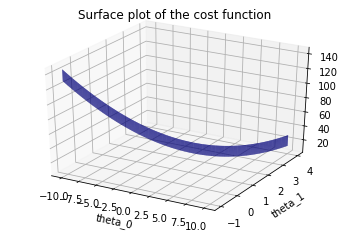

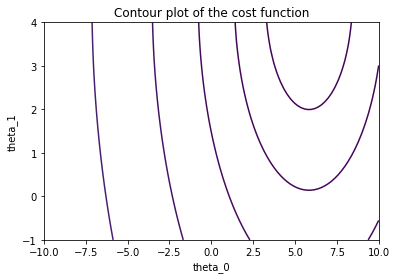

In [33]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

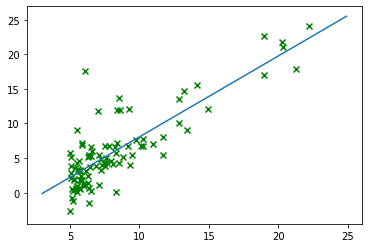

In [36]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [22]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err %' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred       err %
51   5.3077   1.83960   2.452689   33.327309
41   6.8825   3.91150   4.395925   12.384637
10   5.7107   3.25220   2.949974    9.292972
96   5.4369   0.61705   2.612116  323.323306
92   5.8707   7.20290   3.147407   56.303612
38  12.8360  10.11700  11.742290   16.064936
34   8.2111   6.54260   6.035361    7.752871
73   7.2259   3.34110   4.819666   44.253868
13   8.4084   7.22580   6.278820   13.105532
89   5.0594   2.82140   2.146298   23.927922
64  18.9590  17.05400  19.297810   13.157088
63  14.9080  12.05400  14.299049   18.624930
70  10.1360   6.67990   8.410605   25.909145
36   8.0959   4.11640   5.893209   43.164143
74   5.0269  -2.68070   2.106194  178.568806
39   6.3534   5.49740   3.743038   31.912572
9    5.0546   3.81660   2.140375   43.919337
78  10.2740   6.75260   8.580891   27.075365
65   7.2182   4.88520   4.810165    1.535976
14   5.6407   0.71618   2.863597  299.843188
77   5.0365   5.70140   2.118040   62.850528
72   6.006